# Not an ideal Network:



In this notebook we will be using very simple architecture for neural network, which is not an ideal network. 

we can make this network ideal by considering following parameters:

* How many layers we are adding in our network

* MaxPooling

* 1x1 Convolutions

* 3x3 Convolutions

* Receptive Field

* SoftMax

* Learning Rate

* Batch Normalization

* Position of MaxPooling

* Number of Epochs and when to increase them

* DropOut

* when do we know we have some overfitting

* How do we know our network is not going well, comparatively, very early

* When to add validation checks


In notebook session4_Assignment1B we will fix the network architecture that is once we decided Number of layers, Sequence of layers etc we will not change this

architecture in further notebooks.





# **Import Libraries and modules**

In [1]:
# install keras library and import keras module

# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
# here, we are importing numpy module with short name 'np' and importing sequential type model,
# Flatten and convolution2D layers, util and mnist dataset


import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

# Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


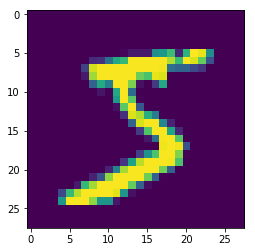

In [4]:
# print shape of training data
print (X_train.shape)

# import pyplot module and print 0th training example from training dataset
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

# Preprocess input data for Keras

In [0]:
# reshape trining and test dataset 
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# convert train and test data into float and normalize values
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Preprocess class labels for Keras¶

In [7]:
# look at labels of first 10 training example
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# Define model architecture

In [10]:
# Import Activation 
from keras.layers import Activation

# Declare sequential model
model = Sequential()
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 26))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  


In [11]:
#summary of model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 10)          67610     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 68,260
Trainable params: 68,260
Non-trainable params: 0
_________________________________________________________________


# Compile model

In [0]:
# compile the model, while compiling the model declare loss function and optimizer
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# Fit model on training data

In [0]:
# To train the model, pass training data, declare batch size and number of epochs
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.1727 - acc: 0.9502
Epoch 2/10
60000/60000 [==============================] - 8s 133us/step - loss: 0.0682 - acc: 0.9797
Epoch 3/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.0496 - acc: 0.9846
Epoch 4/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0376 - acc: 0.9882
Epoch 5/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.0284 - acc: 0.9914
Epoch 6/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.0214 - acc: 0.9930
Epoch 7/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.0162 - acc: 0.9950
Epoch 8/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.0130 - acc: 0.9960
Epoch 9/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.0102 - acc: 0.9971
Epoch 10/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.0074 - 

# Evaluate model on test data

In [0]:
# Pass test data to evaluate model performance
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
# Print the score 
print(score)

[0.08334661134941707, 0.9811]


In [0]:
# predict labels of test data
y_pred = model.predict(X_test)

In [0]:
# print 1st ten prediction 
print(y_pred[:9])
print(y_test[:9])

[[1.94843303e-17 3.02085274e-19 2.05874390e-14 7.31775529e-10
  6.55789032e-22 3.26241728e-15 3.48228895e-27 1.00000000e+00
  4.87495678e-13 9.47476559e-12]
 [3.73409048e-16 1.31425268e-14 1.00000000e+00 3.63094225e-14
  7.24162108e-26 5.24574228e-16 1.05730910e-11 3.07616410e-31
  1.17574605e-16 1.76456487e-25]
 [1.45470210e-06 9.99874830e-01 1.60341096e-06 2.72909612e-10
  1.16656978e-04 7.89323185e-09 2.17120508e-08 2.92400756e-07
  5.25521637e-06 1.59865998e-09]
 [1.00000000e+00 2.20173706e-13 1.78376446e-11 5.30211895e-14
  8.18643520e-14 3.78628275e-11 1.21952946e-08 1.06927106e-10
  1.66629406e-13 9.07748095e-12]
 [1.38342266e-14 5.23366941e-16 8.44597829e-14 2.97027485e-13
  1.00000000e+00 6.72408436e-17 9.24418894e-15 2.01106479e-10
  1.45793419e-10 3.19212283e-08]
 [5.27413535e-09 9.99943256e-01 6.70477718e-09 6.09850156e-11
  8.67429753e-06 1.77067718e-11 5.43788365e-12 4.75316665e-05
  4.44261048e-07 7.14704351e-10]
 [7.10752925e-19 2.64800598e-10 1.85042026e-09 1.32214628e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()